In [1]:
import re
import pandas as pd
from wordcloud import WordCloud
from stop_word import STOP_WORDS, STOP_PREFIXES, PUNCTUATION
from IPython.display import Image


In [2]:
def check_in_first(word, norm_list):
    """
    check whether the word contains norm_list
    Args:
        word: a word
        norm_list: STOP WORD

    Returns:
    a bool
    """

    if_included = False

    for norm in norm_list:
        if norm in word and word.startswith(norm):
            if_included = True

    return if_included


def clean_text(text):
    """
    clean one tweet
    Args:
        text: a tweet
        case_sensitive: bool indicating whether case_sensitive
        ban_stop_word: STOP WORD list

    Returns:
    cleaned tweet
    """
    clean_t1 = re.sub(r'[^ \w\.]', '', text).lower().split()

    clean_t2 = [x.strip(PUNCTUATION) for x in clean_t1]

    clean_t3 = [x for x in clean_t2 if len(x) != 0]

    clean_t3 = [x for x in clean_t3 if x not in STOP_WORDS]

    clean_t4 = [x for x in clean_t3 if not check_in_first(x, STOP_PREFIXES)]

    return clean_t4


In [3]:
def expand_wordstore(text, store):
    """
    Add keywords to word store
    """
    cleaned_text = clean_text(text)
    count_result = pd.Series(cleaned_text).value_counts()
    for word in count_result.index:
        if word not in store:
            store[word] = 1
        else:
            store[word] += count_result[word]


def sort_dictionary(store):
    """
    rank all keywords by their frequency
    """
    store['question'] = {k: v for k, v in
                         sorted(store['question'].items(),
                                key=lambda item: item[1], reverse=True)
                         if 'interview' not in k
                         and 'question' not in k
                         and 'ans' not in k and "1" not in k and "2" not in k and "3" not in k and "4" not in k and "5" not in k}

    store['interview'] = {k: v for k, v in
                          sorted(store['interview'].items(),
                                 key=lambda item: item[1], reverse=True)
                          if 'interview' not in k
                          and 'question' not in k
                          and 'ans' not in k and "1" not in k and "2" not in k and "3" not in k and "4" not in k and "5" not in k}

In [4]:
def get_wordstore(data_name):
    """
    formally get the wordstore of one data set
    """
    raw_data = pd.read_csv(f"../data/{data_name}")
    raw_data.fillna('', inplace=True)
    word_store_before = {'question': dict(), 'interview': dict()}
    word_store_after = {'question': dict(), 'interview': dict()}

    for i in raw_data.index:
        date, question, interview = raw_data.loc[i, ['Date', 'Question', 'Interview']]
        if date <= '2020-2-01':
            expand_wordstore(question, word_store_before['question'])
            expand_wordstore(interview, word_store_before['interview'])
        else:
            expand_wordstore(question, word_store_after['question'])
            expand_wordstore(interview, word_store_after['interview'])
        if i % 10000 == 0:
            print(i)

    sort_dictionary(word_store_before)
    sort_dictionary(word_store_after)

    return word_store_before, word_store_after

In [5]:
A,B = get_wordstore("whole1.csv")

0


C:\Users\HardH\AppData\Local\Temp/ipykernel_17188/1852315217.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  count_result = pd.Series(cleaned_text).value_counts()


10000
20000
30000
40000
50000
60000


In [6]:
B

{'question': {'time': 2799,
  'amazon': 982,
  'leadership': 866,
  'data': 810,
  'experience': 688,
  'design': 687,
  'leetcode': 648,
  'project': 647,
  'situation': 640,
  'principles': 634,
  'based': 628,
  'coding': 607,
  'onsite': 520,
  'difficult': 439,
  'customer': 428,
  'behavioral': 420,
  'array': 413,
  'team': 410,
  'tree': 402,
  'technical': 398,
  'sql': 369,
  'job': 366,
  'product': 358,
  'medium': 351,
  'role': 346,
  'process': 334,
  'basic': 327,
  'list': 325,
  'decision': 315,
  'string': 314,
  'code': 313,
  'binary': 312,
  'google': 293,
  'round': 283,
  'handle': 274,
  'explain': 271,
  'solve': 262,
  'test': 260,
  'nda': 252,
  'previous': 245,
  'manager': 237,
  'star': 233,
  'easy': 233,
  'algorithm': 214,
  'didnt': 213,
  'programming': 202,
  'algorithms': 201,
  'online': 197,
  'search': 194,
  'company': 193,
  'structures': 192,
  'solution': 185,
  'current': 183,
  'specific': 182,
  'linked': 181,
  'deal': 179,
  'level': 1

In [7]:
A1 = A["question"]
A1

{'time': 6076,
 'data': 2663,
 'design': 2232,
 'amazon': 2162,
 'array': 2051,
 'tree': 1687,
 'write': 1668,
 'string': 1640,
 'list': 1623,
 'difficult': 1581,
 'situation': 1539,
 'coding': 1502,
 'binary': 1501,
 'experience': 1477,
 'leadership': 1369,
 'project': 1354,
 'google': 1289,
 'based': 1282,
 'product': 1256,
 'code': 1210,
 'nda': 1188,
 'technical': 1172,
 'algorithm': 1133,
 'basic': 1120,
 'test': 1083,
 'job': 1039,
 'process': 1036,
 'function': 1024,
 'customer': 1008,
 'explain': 997,
 'behavioral': 947,
 'team': 944,
 'search': 927,
 'linked': 911,
 'principles': 908,
 'implement': 896,
 'structures': 810,
 'handle': 784,
 'solve': 749,
 'facebook': 744,
 'return': 730,
 'algorithms': 721,
 'role': 715,
 'manager': 710,
 'structure': 700,
 'programming': 676,
 'phone': 673,
 'sql': 669,
 'specific': 667,
 'decision': 657,
 'signed': 637,
 'leetcode': 632,
 'didnt': 625,
 'round': 612,
 'solution': 604,
 'people': 600,
 'position': 597,
 'dont': 587,
 'previous

In [8]:
A2 = A["interview"]
A2

{'phone': 29339,
 'recruiter': 18480,
 'process': 17989,
 'round': 13765,
 'time': 12245,
 'technical': 12203,
 'online': 11264,
 'onsite': 10607,
 'coding': 9944,
 'test': 9838,
 'amazon': 9400,
 'experience': 9300,
 'manager': 8524,
 'email': 8074,
 'hr': 7931,
 'day': 7837,
 'google': 7268,
 'hiring': 7182,
 'job': 7003,
 'people': 6791,
 'minutes': 6508,
 'didnt': 6483,
 'applied': 6392,
 'team': 6291,
 'position': 6282,
 'week': 5957,
 'rounds': 5901,
 'weeks': 5874,
 'screen': 5765,
 'days': 5611,
 'contacted': 5607,
 'offer': 5017,
 'code': 4638,
 'person': 4566,
 'company': 4540,
 'role': 4520,
 'easy': 4443,
 'told': 4394,
 'received': 4308,
 'resume': 4213,
 'data': 3998,
 'behavioral': 3847,
 'dont': 3816,
 'based': 3780,
 'scheduled': 3763,
 'hour': 3743,
 'nice': 3735,
 'basic': 3519,
 'pretty': 3497,
 'design': 3352,
 'set': 3298,
 'leadership': 3236,
 'feedback': 3209,
 'lot': 3126,
 'called': 3094,
 'background': 3083,
 'assessment': 3069,
 'skills': 3025,
 'difficult':

In [9]:
B1 = B["question"]
B1

{'time': 2799,
 'amazon': 982,
 'leadership': 866,
 'data': 810,
 'experience': 688,
 'design': 687,
 'leetcode': 648,
 'project': 647,
 'situation': 640,
 'principles': 634,
 'based': 628,
 'coding': 607,
 'onsite': 520,
 'difficult': 439,
 'customer': 428,
 'behavioral': 420,
 'array': 413,
 'team': 410,
 'tree': 402,
 'technical': 398,
 'sql': 369,
 'job': 366,
 'product': 358,
 'medium': 351,
 'role': 346,
 'process': 334,
 'basic': 327,
 'list': 325,
 'decision': 315,
 'string': 314,
 'code': 313,
 'binary': 312,
 'google': 293,
 'round': 283,
 'handle': 274,
 'explain': 271,
 'solve': 262,
 'test': 260,
 'nda': 252,
 'previous': 245,
 'manager': 237,
 'star': 233,
 'easy': 233,
 'algorithm': 214,
 'didnt': 213,
 'programming': 202,
 'algorithms': 201,
 'online': 197,
 'search': 194,
 'company': 193,
 'structures': 192,
 'solution': 185,
 'current': 183,
 'specific': 182,
 'linked': 181,
 'deal': 179,
 'level': 178,
 'en': 178,
 'write': 176,
 'facebook': 175,
 'hard': 169,
 'lot'

In [10]:
B2 = B["interview"]
B2

{'process': 6334,
 'round': 4733,
 'recruiter': 4151,
 'phone': 4007,
 'coding': 3544,
 'technical': 3493,
 'online': 3308,
 'onsite': 3224,
 'experience': 2840,
 'time': 2790,
 'amazon': 2743,
 'rounds': 2464,
 'test': 2406,
 'manager': 2302,
 'hr': 1933,
 'hiring': 1932,
 'behavioral': 1914,
 'leadership': 1905,
 'job': 1805,
 'easy': 1770,
 'assessment': 1716,
 'team': 1658,
 'principles': 1644,
 'day': 1538,
 'role': 1522,
 'minutes': 1488,
 'people': 1486,
 'didnt': 1467,
 'based': 1407,
 'email': 1362,
 'screen': 1356,
 'final': 1255,
 'hour': 1116,
 'position': 1105,
 'company': 1076,
 'days': 1065,
 'nice': 1056,
 'virtual': 1049,
 'offer': 1045,
 'data': 1011,
 'applied': 1004,
 'feedback': 979,
 'leetcode': 914,
 'design': 910,
 'lot': 899,
 'pretty': 896,
 'weeks': 894,
 'person': 891,
 'video': 884,
 'google': 856,
 'hard': 855,
 'friendly': 842,
 'prepare': 827,
 'difficult': 821,
 'code': 819,
 'dont': 813,
 'star': 792,
 'basic': 790,
 'week': 779,
 'skills': 760,
 'rece

In [11]:
def fusion(dic1,dic2):
    """
    merge the question store and interview store together
    """
    new_dic = {}
    for key1,value1 in dic1.items():
        if key1 not in new_dic.keys():
            new_dic[key1] = value1
    for key2,value2 in dic2.items():
        if key2 not in new_dic.keys():
            new_dic[key2] = value2
        else:
            new_dic[key2] += value2
    sorted_dic = {k: v for k, v in sorted(new_dic.items(),key=lambda item: item[1], reverse=True)}
    return sorted_dic

In [12]:
before = fusion(A1,A2)
after = fusion(B1,B2)

In [13]:
before

{'phone': 30012,
 'process': 19025,
 'recruiter': 18661,
 'time': 18321,
 'round': 14377,
 'technical': 13375,
 'online': 11765,
 'amazon': 11562,
 'coding': 11446,
 'onsite': 10945,
 'test': 10921,
 'experience': 10777,
 'manager': 9234,
 'google': 8557,
 'day': 8304,
 'email': 8228,
 'hr': 8170,
 'job': 8042,
 'people': 7391,
 'hiring': 7343,
 'team': 7235,
 'didnt': 7108,
 'position': 6879,
 'minutes': 6715,
 'data': 6661,
 'applied': 6502,
 'week': 6046,
 'rounds': 6018,
 'screen': 5919,
 'weeks': 5913,
 'code': 5848,
 'days': 5777,
 'contacted': 5619,
 'design': 5584,
 'role': 5235,
 'company': 5118,
 'offer': 5114,
 'based': 5062,
 'easy': 4934,
 'person': 4897,
 'behavioral': 4794,
 'basic': 4639,
 'leadership': 4605,
 'resume': 4600,
 'told': 4555,
 'received': 4483,
 'difficult': 4418,
 'dont': 4403,
 'hour': 3917,
 'pretty': 3798,
 'set': 3792,
 'scheduled': 3790,
 'nice': 3788,
 'write': 3760,
 'lot': 3673,
 'principles': 3578,
 'feedback': 3472,
 'background': 3452,
 'skill

In [14]:
after

{'process': 6668,
 'time': 5589,
 'round': 5016,
 'recruiter': 4217,
 'coding': 4151,
 'phone': 4126,
 'technical': 3891,
 'onsite': 3744,
 'amazon': 3725,
 'experience': 3528,
 'online': 3505,
 'leadership': 2771,
 'test': 2666,
 'rounds': 2542,
 'manager': 2539,
 'behavioral': 2334,
 'principles': 2278,
 'job': 2171,
 'team': 2068,
 'based': 2035,
 'easy': 2003,
 'hr': 1988,
 'hiring': 1981,
 'role': 1868,
 'data': 1821,
 'assessment': 1802,
 'didnt': 1680,
 'day': 1671,
 'people': 1629,
 'design': 1597,
 'leetcode': 1562,
 'minutes': 1546,
 'email': 1393,
 'screen': 1385,
 'final': 1294,
 'company': 1269,
 'position': 1267,
 'difficult': 1260,
 'hour': 1154,
 'google': 1149,
 'code': 1132,
 'feedback': 1132,
 'basic': 1117,
 'days': 1108,
 'virtual': 1082,
 'offer': 1076,
 'nice': 1068,
 'lot': 1065,
 'applied': 1053,
 'star': 1025,
 'hard': 1024,
 'medium': 1009,
 'sql': 983,
 'project': 978,
 'dont': 974,
 'situation': 963,
 'person': 950,
 'pretty': 939,
 'prepare': 923,
 'video'

In [21]:
def slice_dic(dic,start,end):
    """
    obtain specific part of the wordstore
    """
    keys = dic.keys()
    dict_slice = {}
    for k in list(keys)[start:end]:
        dict_slice[k] = dic[k]
    return dict_slice

In [22]:
before_sliced = slice_dic(before,0,100)
before_sliced

{'phone': 30012,
 'process': 19025,
 'recruiter': 18661,
 'time': 18321,
 'round': 14377,
 'technical': 13375,
 'online': 11765,
 'amazon': 11562,
 'coding': 11446,
 'onsite': 10945,
 'test': 10921,
 'experience': 10777,
 'manager': 9234,
 'google': 8557,
 'day': 8304,
 'email': 8228,
 'hr': 8170,
 'job': 8042,
 'people': 7391,
 'hiring': 7343,
 'team': 7235,
 'didnt': 7108,
 'position': 6879,
 'minutes': 6715,
 'data': 6661,
 'applied': 6502,
 'week': 6046,
 'rounds': 6018,
 'screen': 5919,
 'weeks': 5913,
 'code': 5848,
 'days': 5777,
 'contacted': 5619,
 'design': 5584,
 'role': 5235,
 'company': 5118,
 'offer': 5114,
 'based': 5062,
 'easy': 4934,
 'person': 4897,
 'behavioral': 4794,
 'basic': 4639,
 'leadership': 4605,
 'resume': 4600,
 'told': 4555,
 'received': 4483,
 'difficult': 4418,
 'dont': 4403,
 'hour': 3917,
 'pretty': 3798,
 'set': 3792,
 'scheduled': 3790,
 'nice': 3788,
 'write': 3760,
 'lot': 3673,
 'principles': 3578,
 'feedback': 3472,
 'background': 3452,
 'skill

In [23]:
after_sliced = slice_dic(after,0,100)
after_sliced

{'process': 6668,
 'time': 5589,
 'round': 5016,
 'recruiter': 4217,
 'coding': 4151,
 'phone': 4126,
 'technical': 3891,
 'onsite': 3744,
 'amazon': 3725,
 'experience': 3528,
 'online': 3505,
 'leadership': 2771,
 'test': 2666,
 'rounds': 2542,
 'manager': 2539,
 'behavioral': 2334,
 'principles': 2278,
 'job': 2171,
 'team': 2068,
 'based': 2035,
 'easy': 2003,
 'hr': 1988,
 'hiring': 1981,
 'role': 1868,
 'data': 1821,
 'assessment': 1802,
 'didnt': 1680,
 'day': 1671,
 'people': 1629,
 'design': 1597,
 'leetcode': 1562,
 'minutes': 1546,
 'email': 1393,
 'screen': 1385,
 'final': 1294,
 'company': 1269,
 'position': 1267,
 'difficult': 1260,
 'hour': 1154,
 'google': 1149,
 'code': 1132,
 'feedback': 1132,
 'basic': 1117,
 'days': 1108,
 'virtual': 1082,
 'offer': 1076,
 'nice': 1068,
 'lot': 1065,
 'applied': 1053,
 'star': 1025,
 'hard': 1024,
 'medium': 1009,
 'sql': 983,
 'project': 978,
 'dont': 974,
 'situation': 963,
 'person': 950,
 'pretty': 939,
 'prepare': 923,
 'video'

In [24]:
wc = WordCloud(background_color='white', width = 1000, height=1000, margin=2)

In [25]:
wc.fit_words(before_sliced)

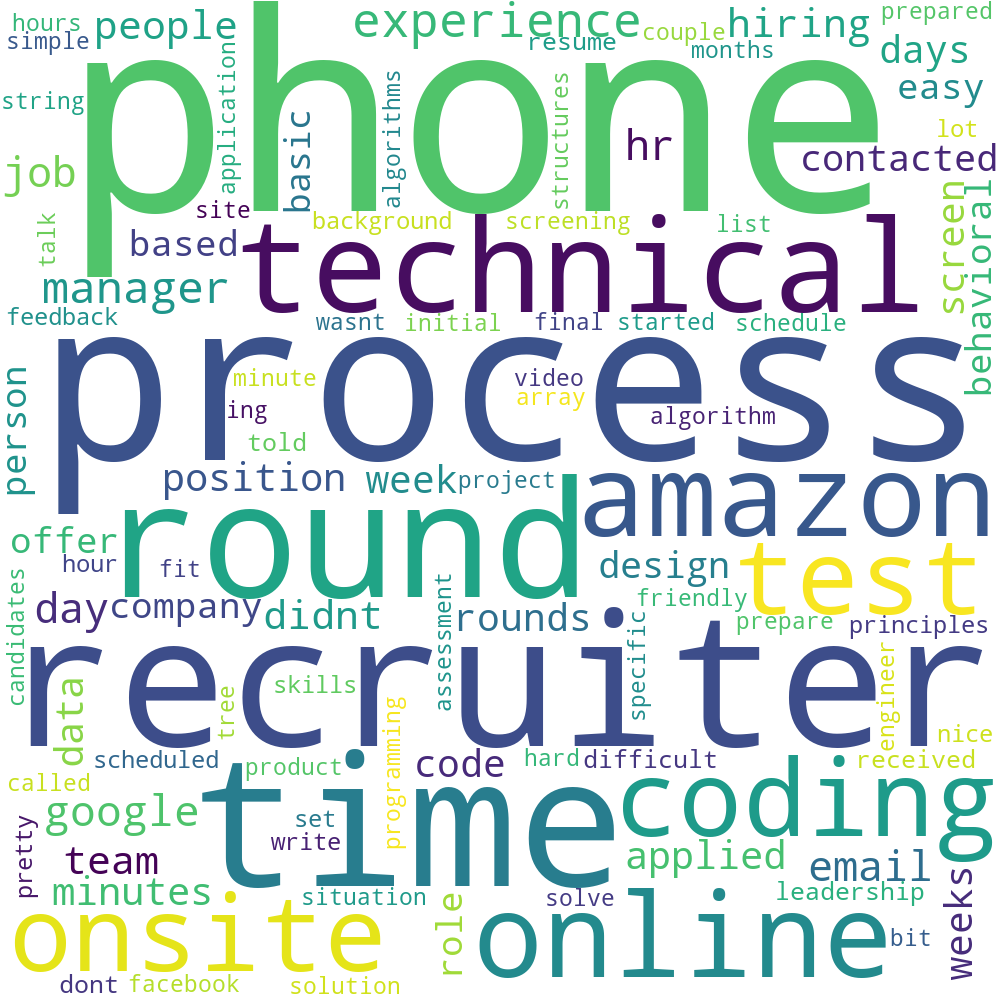

In [26]:
wc.to_file('../outcome/before_sliced.png')
Image(filename='../outcome/before_sliced.png')

In [27]:
wc2 = WordCloud(background_color='white', width = 1000, height=1000, margin=2)

In [28]:
wc2.fit_words(after_sliced)

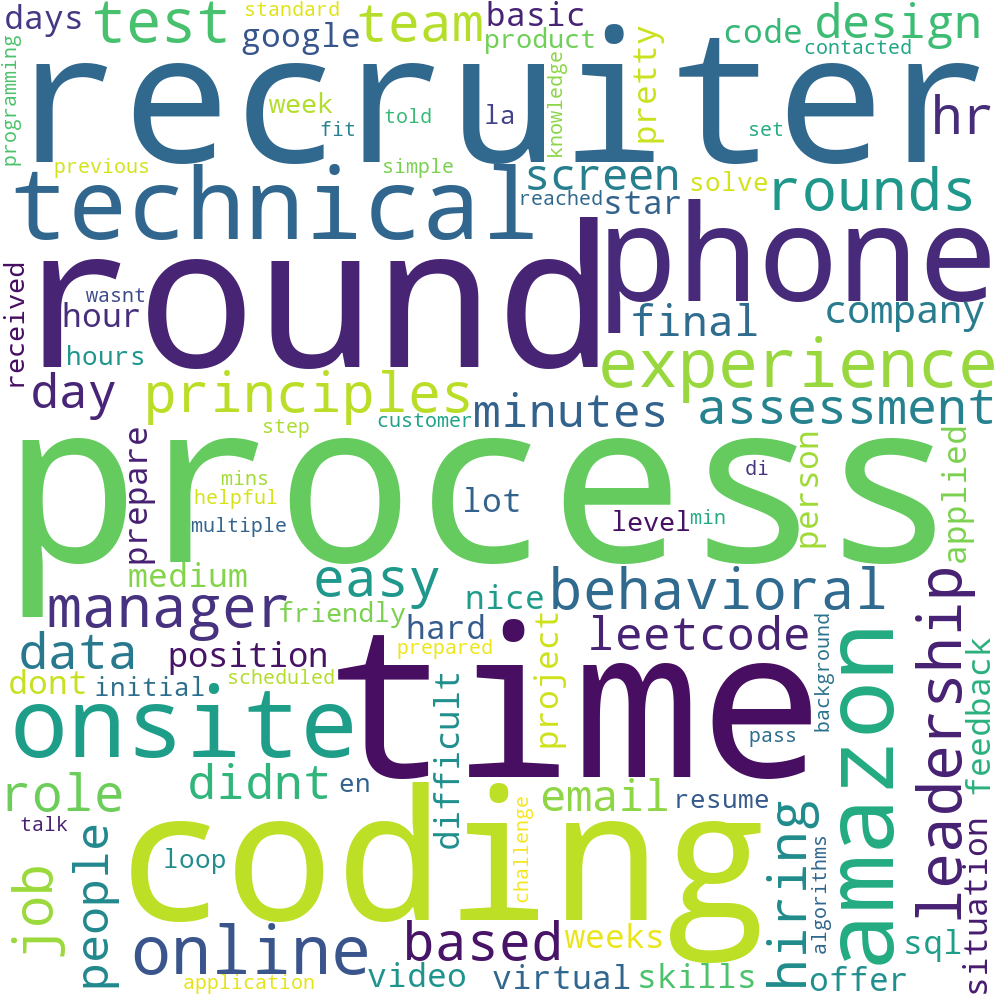

In [37]:
wc2.to_file('../outcome/after_sliced.png')
Image(filename='../outcome/after_sliced.png')

In [30]:
def count_grade(dic):
    index = 0
    new_dic = {}
    for key in dic.keys():
        index += 1
        new_dic[key] = index
    return new_dic

In [33]:
after_sliced_grade = count_grade(after_sliced)
after_sliced_grade

{'process': 1,
 'time': 2,
 'round': 3,
 'recruiter': 4,
 'coding': 5,
 'phone': 6,
 'technical': 7,
 'onsite': 8,
 'amazon': 9,
 'experience': 10,
 'online': 11,
 'leadership': 12,
 'test': 13,
 'rounds': 14,
 'manager': 15,
 'behavioral': 16,
 'principles': 17,
 'job': 18,
 'team': 19,
 'based': 20,
 'easy': 21,
 'hr': 22,
 'hiring': 23,
 'role': 24,
 'data': 25,
 'assessment': 26,
 'didnt': 27,
 'day': 28,
 'people': 29,
 'design': 30,
 'leetcode': 31,
 'minutes': 32,
 'email': 33,
 'screen': 34,
 'final': 35,
 'company': 36,
 'position': 37,
 'difficult': 38,
 'hour': 39,
 'google': 40,
 'code': 41,
 'feedback': 42,
 'basic': 43,
 'days': 44,
 'virtual': 45,
 'offer': 46,
 'nice': 47,
 'lot': 48,
 'applied': 49,
 'star': 50,
 'hard': 51,
 'medium': 52,
 'sql': 53,
 'project': 54,
 'dont': 55,
 'situation': 56,
 'person': 57,
 'pretty': 58,
 'prepare': 59,
 'video': 60,
 'weeks': 61,
 'skills': 62,
 'friendly': 63,
 'product': 64,
 'level': 65,
 'received': 66,
 'week': 67,
 'resume

In [34]:
before_sliced_grade = count_grade(before_sliced)
before_sliced_grade

{'phone': 1,
 'process': 2,
 'recruiter': 3,
 'time': 4,
 'round': 5,
 'technical': 6,
 'online': 7,
 'amazon': 8,
 'coding': 9,
 'onsite': 10,
 'test': 11,
 'experience': 12,
 'manager': 13,
 'google': 14,
 'day': 15,
 'email': 16,
 'hr': 17,
 'job': 18,
 'people': 19,
 'hiring': 20,
 'team': 21,
 'didnt': 22,
 'position': 23,
 'minutes': 24,
 'data': 25,
 'applied': 26,
 'week': 27,
 'rounds': 28,
 'screen': 29,
 'weeks': 30,
 'code': 31,
 'days': 32,
 'contacted': 33,
 'design': 34,
 'role': 35,
 'company': 36,
 'offer': 37,
 'based': 38,
 'easy': 39,
 'person': 40,
 'behavioral': 41,
 'basic': 42,
 'leadership': 43,
 'resume': 44,
 'told': 45,
 'received': 46,
 'difficult': 47,
 'dont': 48,
 'hour': 49,
 'pretty': 50,
 'set': 51,
 'scheduled': 52,
 'nice': 53,
 'write': 54,
 'lot': 55,
 'principles': 56,
 'feedback': 57,
 'background': 58,
 'skills': 59,
 'facebook': 60,
 'assessment': 61,
 'called': 62,
 'product': 63,
 'project': 64,
 'algorithm': 65,
 'programming': 66,
 'hours'

In [35]:
def compare(dic1, dic2):
    output = []
    for key in dic2.keys():
        if key in dic1:
            if dic2[key] < dic1[key]:
                output.append((key,"rank before",dic1[key],"rank after",dic2[key],"goes up",dic1[key]-dic2[key]))
    return output

In [36]:
compare(before_sliced_grade, after_sliced_grade)

[('process', 'rank before', 2, 'rank after', 1, 'goes up', 1),
 ('time', 'rank before', 4, 'rank after', 2, 'goes up', 2),
 ('round', 'rank before', 5, 'rank after', 3, 'goes up', 2),
 ('coding', 'rank before', 9, 'rank after', 5, 'goes up', 4),
 ('onsite', 'rank before', 10, 'rank after', 8, 'goes up', 2),
 ('experience', 'rank before', 12, 'rank after', 10, 'goes up', 2),
 ('leadership', 'rank before', 43, 'rank after', 12, 'goes up', 31),
 ('rounds', 'rank before', 28, 'rank after', 14, 'goes up', 14),
 ('behavioral', 'rank before', 41, 'rank after', 16, 'goes up', 25),
 ('principles', 'rank before', 56, 'rank after', 17, 'goes up', 39),
 ('team', 'rank before', 21, 'rank after', 19, 'goes up', 2),
 ('based', 'rank before', 38, 'rank after', 20, 'goes up', 18),
 ('easy', 'rank before', 39, 'rank after', 21, 'goes up', 18),
 ('role', 'rank before', 35, 'rank after', 24, 'goes up', 11),
 ('assessment', 'rank before', 61, 'rank after', 26, 'goes up', 35),
 ('design', 'rank before', 34,